## 유방암 여부

In [170]:
# 라이브러리 및 데이터
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [171]:
# 데이터 샘플
print(cancer.data[0])
print(cancer.target[0])
print(cancer.target_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0
['malignant' 'benign']


In [172]:
data = cancer.data
target = cancer.target

In [173]:
data_df = pd.DataFrame(data=data, columns=cancer.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [174]:
# 데이터 유형 확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

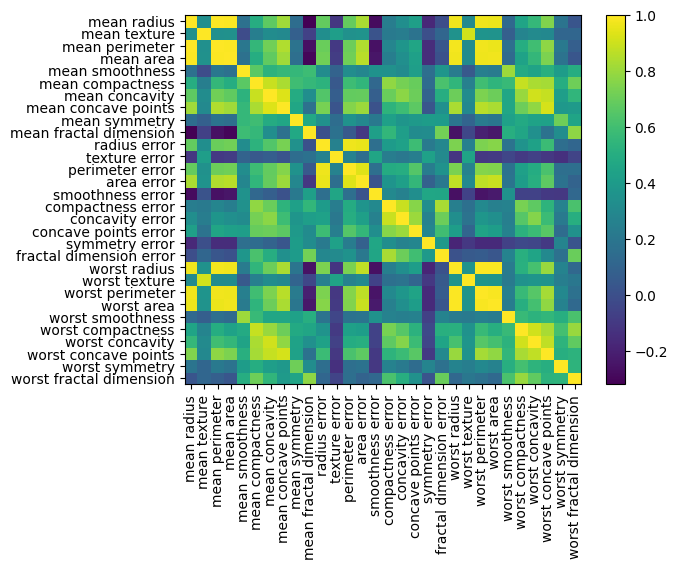

In [186]:
# 상관 관계 확인
corr = data_df.corr()
plt.xticks(ticks=np.arange(0.5, len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(0.5, len(corr.columns)), labels=corr.columns[::-1])
plt.pcolor(corr[::-1])
plt.colorbar()

In [175]:
# 데이터 기초 통계 확인
describe = data_df.describe()
describe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [176]:
# 결측치 확인
data_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [184]:
# 이상치 확인
q1 = data_df.quantile(q=0.25)
q3 = data_df.quantile(q=0.75)
IQR = q3 - q1
min_outlier = q1 - IQR * 1.5
max_outlier = q3 + IQR * 1.5

In [178]:
def check_outlier(row):
    min = row < min_outlier
    max = row > max_outlier
    return min | max
outlier_count = data_df.apply(check_outlier, axis="columns")
outlier_count.sum()

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64

In [179]:
def replace_outlier(row):
    min_index = row < min_outlier
    row[min_index] = min_outlier[min_index]
    max_index = row > max_outlier
    row[max_index] = max_outlier[max_index]
    return row
outlier_data_df = data_df.apply(replace_outlier, axis="columns")

### 데이터 분할 및 정규화

In [180]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.2, random_state=42, stratify=target)
print("X[0, 0]:", X_train.iloc[0, 0])
X_train.shape, X_test.shape, y_train.shape, y_test.shape


X[0, 0]: 10.32


((455, 30), (114, 30), (455,), (114,))

In [181]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
print("X[0, 0]:", X_train[0, 0])

X[0, 0]: 0.22380856625779205


In [182]:
# 이상치 대체 데이터셋
X_ol_train, X_ol_test, y_ol_train, y_ol_test = train_test_split(outlier_data_df, target, test_size=0.2, random_state=42, stratify=target)
X_ol_train.shape, X_ol_test.shape, y_ol_train.shape, y_ol_test.shape
scaler = MinMaxScaler()
scaler = scaler.fit(X_ol_train)
X_ol_train, X_ol_test = scaler.transform(X_ol_train), scaler.transform(X_ol_test)

### 모델 학습 및 평가

In [183]:
# training & evalucation function
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier

def train_eval(model, train_set, test_set):
    model.fit(*train_set)
    X_test, y_test = test_set
    y_pred = model.predict(X_test)
    print(f"Model <{model.__class__.__name__}>")
    print(classification_report(y_test, y_pred))
    
# DecisionTree
train_eval(DecisionTreeClassifier(), (X_train, y_train), (X_test, y_test))
train_eval(DecisionTreeClassifier(), (X_ol_train, y_ol_train), (X_ol_test, y_ol_test))
div_line = "="*54
print(div_line)
# RandomForeset
train_eval(RandomForestClassifier(), (X_train, y_train), (X_test, y_test))
train_eval(RandomForestClassifier(), (X_ol_train, y_ol_train), (X_ol_test, y_ol_test))
print(div_line)
# LogisticRegressor
train_eval(LogisticRegression(), (X_train, y_train), (X_test, y_test))
train_eval(LogisticRegression(), (X_ol_train, y_ol_train), (X_ol_test, y_ol_test))
print(div_line)
# SVM
train_eval(svm.SVC(), (X_train, y_train), (X_test, y_test))
train_eval(svm.SVC(), (X_ol_train, y_ol_train), (X_ol_test, y_ol_test))
print(div_line)
# SGDClassifier
train_eval(SGDClassifier(), (X_train, y_train), (X_test, y_test))
train_eval(SGDClassifier(), (X_ol_train, y_ol_train), (X_ol_test, y_ol_test))
print(div_line)

Model <DecisionTreeClassifier>
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Model <DecisionTreeClassifier>
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.95      0.88      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Model <RandomForestClassifier>
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94  

### 평가 지표 선택 기준
- 암 발병 확률의 평가기준은 진단을 놓치는 경우를 최소화 하기위해 재현율(recall) 지표 선택